In [108]:
#importer les modules:
import matplotlib.pyplot as plt
import numpy as np
import math
from math import *
import time
import random

In [109]:
n = 5      #nombre de points de dicretisation
h = 1/n+1    #le pas d'espace uniforme
#initialiser 
A = [[0 for i in range(n)] for j in range(n)]
for i in range(1,n):
        A[i-1][i] = 1 / h**2
        A[i-1][i-1] = -2 / h**2
        A[i][i-1] = 1 / h**2
        A[n-1][n-1] = -2 / h**2

Fonction à resoudre s(x) = 4πsin(2πx)

In [110]:
#La fonction s en entrée xi et retourne "s(xi) = 4π²sin(2πxi)" sachant que xi = H * i
def s(x : float) -> float :
    return 4 * pi * pi * sin(2*π*x)

La fonction maillage ( Créer un tableau pour stocker les points du maillage Créer un tableau pour stocker les points du maillage)

In [111]:
def maillage(x : list[float] , n : int) :
    for i in range(n+2):
         x[i] = i * h

La fonction qui retourne le vecteur b

In [112]:
def createB(B : list[float], x : list[float], ALPHA : float , BETA : float) :
        B [0] = (s(x[0]) + (ALPHA /h**2))
        B[n-1] = (s(x[n-1]) + (BETA /h**2 ))
        for i in range(1,n-1):
                B[i] = s(x[i])

On a écrit une fonction qui fait la décomposition d'une matrice carrée comme produit d'une matrice triangulaire inférieure L 
par une matrice triangulaire supérieure U.

In [113]:
def LU_decomposition(A:list[list[float]],n : int, h : int):
    L = [[0 for i in range(n)]for j in range(n)]
    U = [[0 for i in range(n)]for j in range(n)]
    for j in range(n):
        L[j][j] = 1
        for i in range(j+1):
            s1 = sum(U[k][j] * L[i][k] for k in range(i))
            U[i][j] = A[i][j] - s1
        for i in range(j, n):
            s2 = sum(U[k][j] * L[i][k] for k in range(j))
            L[i][j] = (A[i][j] - s2) / U[j][j]

    return L, U


On a écrit une fonction qui fait la décomposition LU d'une matrice tridiagonale 

In [114]:
def LU_t_decomposition(A : list[list[float]], n : int, h : int ) :
    L = [[0 for i in range(n)] for j in range(n)]
    U = [[0 for i in range(n)] for j in range(n)]
    
    U[0][0] = A[0][0]
    for i in range(1,n):
        L[i][i-1]= A[i][i-1] / U[i-1] [i-1]
        U[i][i] = A[i][i] - L[i][i-1] * A[i-1][i]
    
    for i in range(n):
        L[i][i] = 1
    
    for i in range(1,n):
        U[i-1][i] = A[i-1][i]
    
    return L,U


Une fonction qui affiche la matrice

In [115]:
def afficher_Mat(a):
    for i in a:
        print(i) 

In [116]:
L , U = LU_t_decomposition(A,n,h)
print("Matrice A:")
afficher_Mat(A)
print("Matrice L:")
afficher_Mat(L)
print("Matrice U:")
afficher_Mat(U)

Matrice A:
[-1.3888888888888888, 0.6944444444444444, 0, 0, 0]
[0.6944444444444444, -1.3888888888888888, 0.6944444444444444, 0, 0]
[0, 0.6944444444444444, -1.3888888888888888, 0.6944444444444444, 0]
[0, 0, 0.6944444444444444, -1.3888888888888888, 0.6944444444444444]
[0, 0, 0, 0.6944444444444444, -1.3888888888888888]
Matrice L:
[1, 0, 0, 0, 0]
[-0.5, 1, 0, 0, 0]
[0, -0.6666666666666667, 1, 0, 0]
[0, 0, -0.7500000000000001, 1, 0]
[0, 0, 0, -0.8, 1]
Matrice U:
[-1.3888888888888888, 0.6944444444444444, 0, 0, 0]
[0, -1.0416666666666665, 0.6944444444444444, 0, 0]
[0, 0, -0.9259259259259258, 0.6944444444444444, 0]
[0, 0, 0, -0.8680555555555555, 0.6944444444444444]
[0, 0, 0, 0, -0.8333333333333333]


Une fonction qui fait la résolution du système

In [117]:
def Sol_y(L : list[list[float]] , b : list[float], n:int) -> list[float] :
    
    y = [0 for i in range (n)]
    y[0] = b[0]/L[0][0]
    
    for i in range (1,n):
        y[i] = (b[i] - L[i][i-1] * y[i-1])/L[i][i]
    return y

def Sol_u(U : list[list[float]] , y : list[float] , n : int) -> list[float]:
    
    u = [0 for i in range(n)]
    u[n-1] = y[n-1] / U[n-1][n-1] 
    
    for i in range(n-2,-1,-1):
        u[i] = (y[i] - U[i][i+1] * u[i+1]) / U[i][i]
    return u


In [118]:
b = [1 for i in range(n)]
y = Sol_y(L,b,n)
u = Sol_u(U,y,n)

In [119]:
print("La solution du système est u:")
print(u)

La solution du système est u:
[-3.6, -5.760000000000001, -6.48, -5.760000000000001, -3.6000000000000005]


Une fonction qui fait la multiplication de deux matrices

In [120]:
def produitmat_mat(A : list[list[float]], B : list[list[float]],n : int)-> list[list[int]] :
    C = [[0 for k in range(n)]for k in range(n)]
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k]*B[k][j]
    return C

In [121]:
B = produitmat_mat(L,U,n)
print("Matrice B:")
afficher_Mat(B)

Matrice B:
[-1.3888888888888888, 0.6944444444444444, 0.0, 0.0, 0.0]
[0.6944444444444444, -1.3888888888888888, 0.6944444444444444, 0.0, 0.0]
[0.0, 0.6944444444444444, -1.3888888888888888, 0.6944444444444444, 0.0]
[0.0, 0.0, 0.6944444444444444, -1.3888888888888888, 0.6944444444444444]
[0.0, 0.0, 0.0, 0.6944444444444444, -1.3888888888888888]


Une fonction qui fait la multiplication d'une matrice et d'un vecteur

In [122]:
def produitmat_vect(A : list[list[float]], u : list[float],n : int) -> list[float]:
        b = [0 for i in range(n)]
        for i in range(n):
            for j in range(n):
                b[i] += A[i][j]*u [j] 
        return b     

In [123]:
ax = produitmat_vect(A,u,n)
print(ax)

[1.0, 1.0, 1.0, 0.9999999999999996, 1.0000000000000009]


tests

In [124]:
def Test_matrice(a:list[list[float]],b: list[list[float]],n:int):
    for i in range(n):
        for j in range(n):
            if(math.floor(a[i][j] - b[i][j])==0):
                return True
            else:
                return False

def Test_vect(a : list[float],b : list[float],n:int):
    for i in range(n):
        if( math.floor(abs(a[i] - b[i]))== 0):
            return True
        else:
            return False

In [125]:
assert Test_matrice(A,B,8) == True
assert Test_vect(ax,b,8) == True

Mesure du temps de l'execution

In [126]:
#mesure du temps de la fonction LU_decomposition
nbrepet = 1
fexp = "{:7.3e}"
t_time = [] 

for repet in range(nbrepet): 
    t0 = time.perf_counter()
    r = LU_decomposition(A,n,h)
    t = time.perf_counter()
    
    t_time.append(t-t0)

In [127]:
#mesure du temps de la fonction Decomposition
nbrepet = 1
fexp = "{:7.3e}"
t_time1 = [] 

for repet in range(nbrepet): 
    t0 = time.perf_counter()
    r = LU_t_decomposition(A, n,h)
    t = time.perf_counter()
    
    t_time1.append(t-t0)

if (t_time[0]>t_time1[0]):
    print("La fonction LU tridiagonalisable est plus rapide que LU")

La fonction LU tridiagonalisable est plus rapide que LU


Tracées des complexités algorithmiques

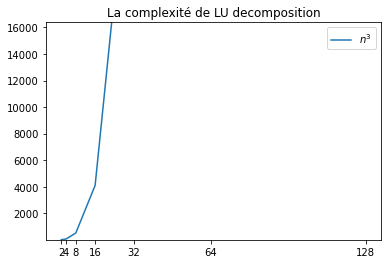

In [128]:

#Tracé de la complexité de lU decomposition 
fig, ax = plt.subplots()
ax.set_title("La complexité de LU decomposition")

n = [2**i for i in range(1,8)]  # les premieres puissances de 2  
ax.plot(n, np.power(n, 3), label="$n^3$")
label_x = [str(val) for val in n]
ax.set_xticks(n, label_x)
ax.set_ylim(1.0, np.power(2,14))
ax.legend(loc="upper right")


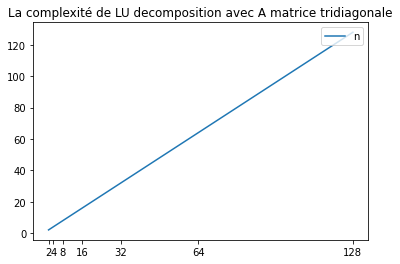

In [130]:
#Tracé de la complexité de lU decomposition avec A matrice tridiagonale
fig, ax = plt.subplots()
ax.set_title("La complexité de LU decomposition avec A matrice tridiagonale")

n = [2**i for i in range(1,8)]  # les premieres puissances de 2  
ax.plot(n, n , label="n")
label_x = [str(val) for val in n]
ax.set_xticks(n, label_x)
ax.legend(loc="upper right")
